# **Rock Paper Scissors image classification using CNN**
RockPaperScissors dataset from Kaggle

In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-12 05:29:22--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.29MB/s    in 55s     

2021-05-12 05:30:18 (5.59 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# buang file yang tidak perlu
!rm -r rockpaperscissors/rps-cv-images
!rm rockpaperscissors/README_rpc-cv-images.txt

In [ ]:
# split dataset menjadi 60% 40%
!pip install split-folders
import splitfolders
splitfolders.ratio("rockpaperscissors", output="dataset", seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:00, 3120.84 files/s]


In [ ]:
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
validation_rock = os.path.join(validation_dir, 'rock')
validation_paper = os.path.join(validation_dir, 'paper')
validation_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:
# iterasi pertama untuk pengenalan gambar
model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
10/10 - 4s - loss: 1.1590 - accuracy: 0.3250 - val_loss: 1.0840 - val_accuracy: 0.4000
Epoch 2/20
10/10 - 3s - loss: 1.1033 - accuracy: 0.3250 - val_loss: 1.0758 - val_accuracy: 0.5000
Epoch 3/20
10/10 - 3s - loss: 1.0901 - accuracy: 0.3750 - val_loss: 1.0968 - val_accuracy: 0.2000
Epoch 4/20
10/10 - 3s - loss: 1.0766 - accuracy: 0.4750 - val_loss: 1.0198 - val_accuracy: 0.4000
Epoch 5/20
10/10 - 3s - loss: 1.0412 - accuracy: 0.5000 - val_loss: 1.0793 - val_accuracy: 0.3500
Epoch 6/20
10/10 - 3s - loss: 1.1072 - accuracy: 0.3000 - val_loss: 0.9965 - val_accuracy: 0.4500
Epoch 7/20
10/10 - 3s - loss: 1.0428 - accuracy: 0.4500 - val_loss: 0.9899 - val_accuracy: 0.7500
Epoch 8/20
10/10 - 3s - loss: 0.9872 - accuracy: 0.7250 - val_loss: 0.9894 - val_accuracy: 0.4500
Epoch 9/20
10/10 - 3s - loss: 1.0598 - accuracy: 0.5250 - val_loss: 0.9115 - val_accuracy: 0.5000
Epoch 10/20
10/10 - 3s - loss: 0.9073 - accuracy: 0.5500 - val_loss: 0.8210 - val_accuracy: 0.7000
Epoch 11/20
10/10 -

In [ ]:
# iterasi kedua untuk training accuracy
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.3239 - accuracy: 0.8800 - val_loss: 0.4141 - val_accuracy: 0.8500
Epoch 2/20
25/25 - 6s - loss: 0.4304 - accuracy: 0.8400 - val_loss: 0.2033 - val_accuracy: 0.9000
Epoch 3/20
25/25 - 6s - loss: 0.2916 - accuracy: 0.9000 - val_loss: 0.3485 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 6s - loss: 0.2742 - accuracy: 0.9200 - val_loss: 0.1708 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 6s - loss: 0.2872 - accuracy: 0.8900 - val_loss: 0.2289 - val_accuracy: 0.8500
Epoch 6/20
25/25 - 7s - loss: 0.2598 - accuracy: 0.8800 - val_loss: 0.7379 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 6s - loss: 0.4776 - accuracy: 0.8500 - val_loss: 0.2066 - val_accuracy: 0.8500
Epoch 8/20
25/25 - 6s - loss: 0.2311 - accuracy: 0.9500 - val_loss: 0.3697 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 6s - loss: 0.2952 - accuracy: 0.8900 - val_loss: 0.4030 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 6s - loss: 0.3182 - accuracy: 0.8700 - val_loss: 0.3398 - val_accuracy: 0.9000
Epoch 11/20
25/25 -

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving 1Tt9U9SzrOm98Xtw.png to 1Tt9U9SzrOm98Xtw.png
1Tt9U9SzrOm98Xtw.png
[[1. 0. 0.]]
Klasifikasi gambar ini adalah: Kertas


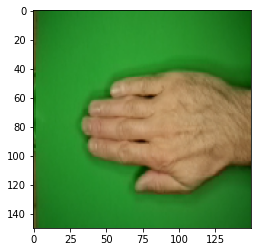

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)

  print(classes)
  hasil = str(classes)
  if (hasil == "[[1. 0. 0.]]"):
      print("Klasifikasi gambar ini adalah: Kertas")
  elif (hasil == "[[1. 1. 0.]]" or hasil == "[[0. 1. 0.]]"):
      print("Klasifikasi gambar ini adalah: Batu")
  elif (hasil == "[[1. 0. 1.]]" or hasil == "[[0. 0. 1.]]"):
      print("Klasifikasi gambar ini adalah: Gunting")
  else:
      print("Gagal meng-klasifikasi gambar, silahkan coba lagi")
#==========================================================================#
# Jika upload files tidak bisa, silahkan enable all cookies pada browser ini